In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

telecom = pd.read_csv('Tel_churn.csv')
print(telecom.shape)
print("\n", telecom.columns.values)
print("\n", telecom.dtypes)


(7043, 21)

 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [63]:
telco_data = telecom.copy()
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
print(telco_data.isnull().sum())

telco_data.dropna(how = 'any', inplace = True)
print("\n", telco_data.shape)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 (7032, 21)


In [64]:
group = pd.cut(telco_data.SeniorCitizen, bins=[-1, 0.5, 1], labels=['No', 'Yes'])
telco_data['SeniorCitizen'] = group

In [65]:
telco_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


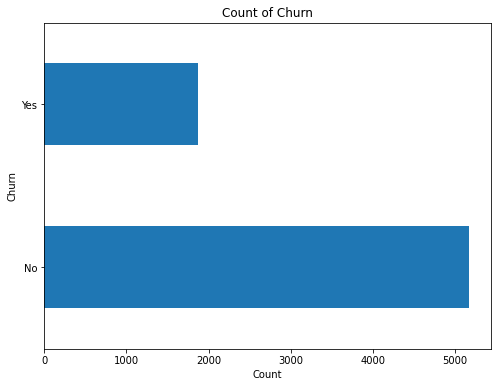

In [66]:
telecom['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.show()

In [43]:
print(100*telecom['Churn'].value_counts()/len(telecom['Churn']))

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


In [67]:
group = pd.cut(telco_data.tenure, bins=np.linspace(0, telco_data['tenure'].max(), 4), labels=['0-24', '24-48', '48-72'])
telco_data['tenure'] = group

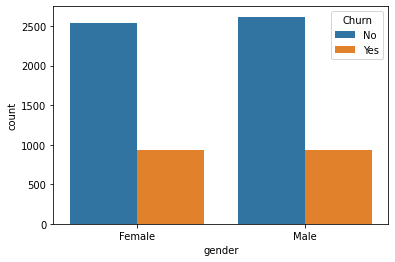

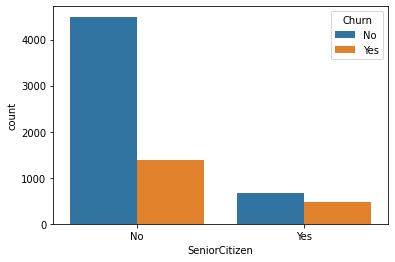

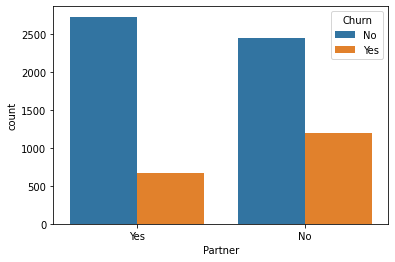

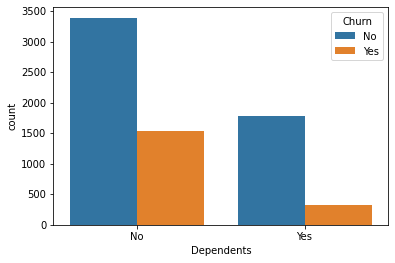

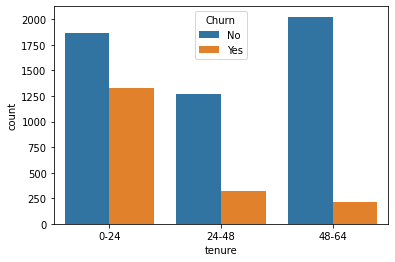

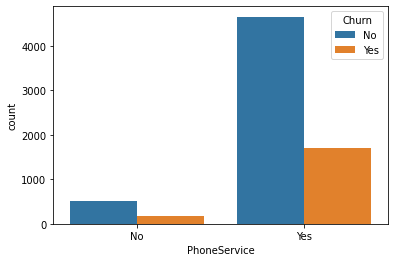

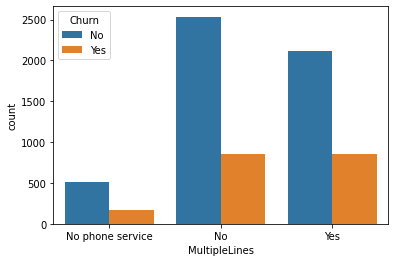

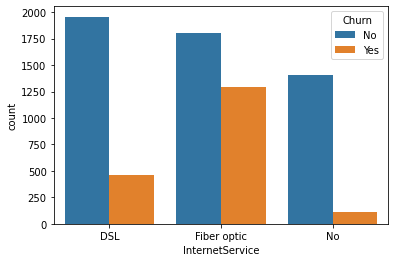

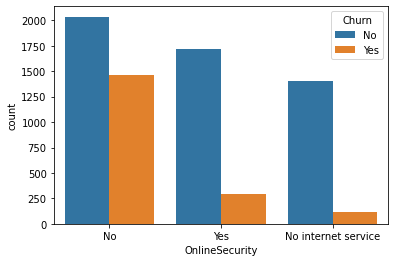

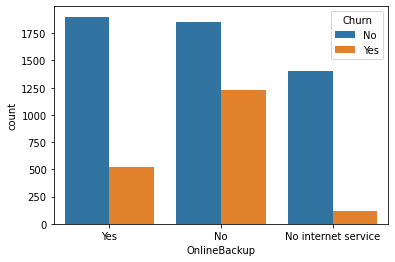

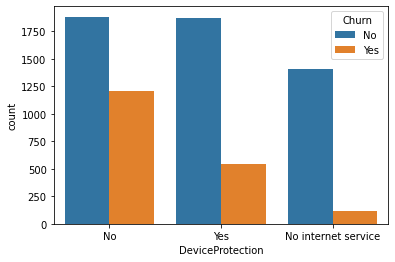

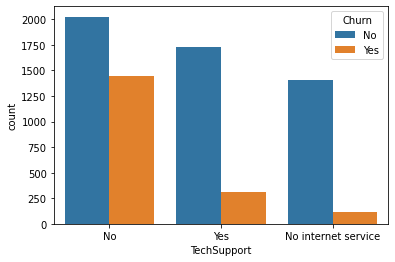

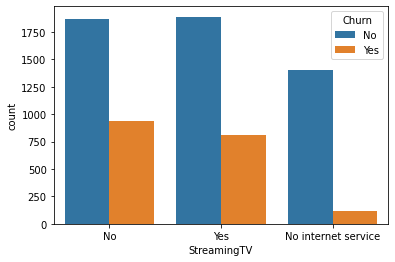

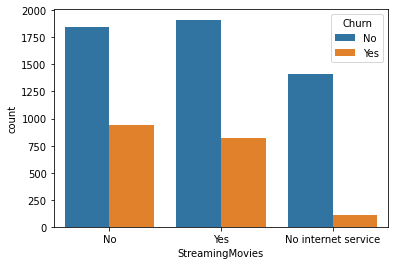

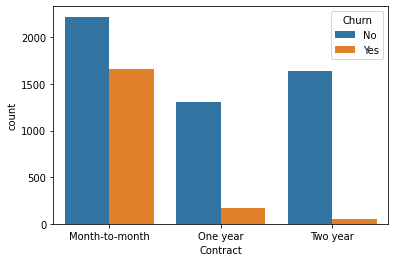

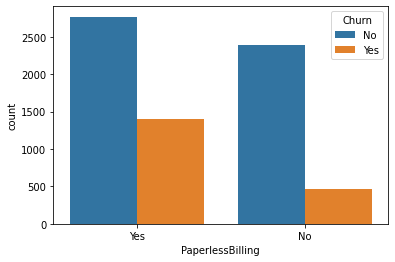

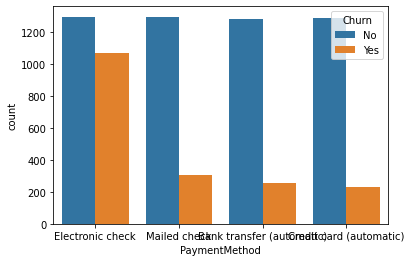

In [57]:
for i, x_ in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'customerID'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=x_, hue='Churn')

Text(0.5, 1.0, 'Monthly charges by churn')

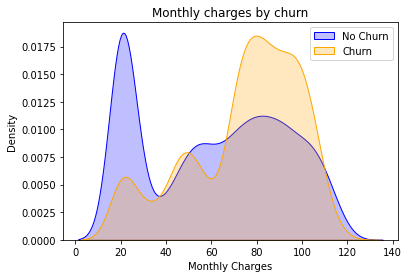

In [58]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'No') ],
                color="Blue", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'Yes') ],
                ax =Mth, color="Orange", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

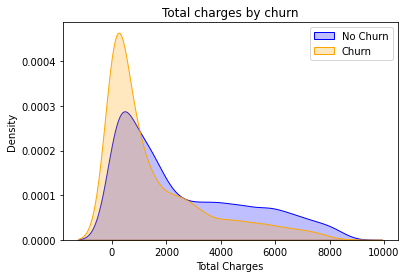

In [59]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'No') ],
                color="Blue", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'Yes') ],
                ax =Tot, color="Orange", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')